In [4]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [5]:
desktop = pd.read_csv('See Desktop - See Mobile.csv')
mobile = pd.read_csv('See Mobile - See Desktop.csv')

MannwhitneyuResult(statistic=33.0, pvalue=0.506004590937926)


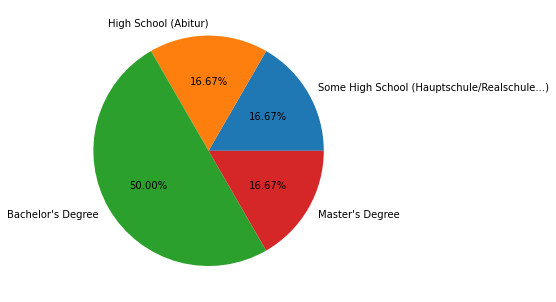

In [98]:
# Degree
# Translate degrees into numbers for U-test 
# Some High School (Hauptschule/Realschule...) == 1
# High School (Abitur) == 2
# Bachelor's Degree == 3
# Master's Degree == 4
degreesDesktop = [3, 2, 3, 3, 2, 1, 4, 2, 3]
degreesMobile = [1, 4, 3, 4, 3, 3, 3, 3, 1]
print(mannwhitneyu(degreesDesktop, degreesMobile))

label = ['Some High School (Hauptschule/Realschule...)', 'High School (Abitur)', 'Bachelor\'s Degree', 'Master\'s Degree']
count = [3, 3, 9, 3]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(count, labels = label,autopct='%1.2f%%')
plt.savefig('Evaluation\img\degree.png', dpi=300)
plt.show()

In [93]:
# SEE Experience 
# 0 = no experience, 1 = experience with SEE
# Same order as the survey took place

mannwhitneyu([0,0,1,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0])

MannwhitneyuResult(statistic=27.0, pvalue=0.13956796660680088)

In [94]:
# Software Development Experinence 
# 0 = no experience, 1 = experience with SD
# Same order as the survey took place

mannwhitneyu([1,1,1,1,0,0,1,0,1], [0,0,0,0,1,1,1,1,0])

MannwhitneyuResult(statistic=49.5, pvalue=0.38389899751303225)

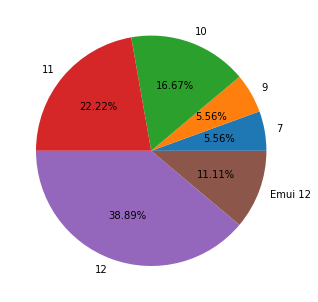

MannwhitneyuResult(statistic=39.0, pvalue=0.9269153068128536)

In [104]:
#Android version
label = ['7', '9', '10', '11', '12', 'Emui 12']
count = [1, 1, 3, 4, 7, 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(count, labels = label,autopct='%1.2f%%')
plt.savefig('Evaluation\img\droid_version.png', dpi=300)
plt.show()

# A7=1, A9=2, A10=3, A11=4, A12=5, Emui=6
mannwhitneyu([4,6,2,5,5,1,5,5,3], [5,4,3,6,5,4,4,5,3])

In [9]:
def calcSUS(df):
    dfSUS1 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","SUS21","SUS22","SUS23","SUS24","SUS25","SUS26","SUS27","SUS28","SUS29","SUS210","Improvements2"])
    dfSUS2 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","SUS11","SUS12","SUS13","SUS14","SUS15","SUS16","SUS17","SUS18","SUS19","SUS110","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","Improvements2"])
    scoresD1 = []
    scoresD2 = []
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS1.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD1.append(score)
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS2.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD2.append(score)
    return scoresD1, scoresD2
    
    

In [92]:
susDesktop = calcSUS(desktop)[0] + calcSUS(mobile)[1]
susMobile =  calcSUS(desktop)[1] + calcSUS(mobile)[0]
print("SUS Desktop:")
print(susDesktop)
print("Desktop average:")
print(np.average(susDesktop))
print("SUS Mobile:")
print(susMobile)
print("Mobile average:")
print(np.average(susMobile))
print(mannwhitneyu(susDesktop, susMobile))

SUS Desktop:
[60.0, 57.5, 80.0, 60.0, 77.5, 70.0, 85.0, 52.5, 80.0, 87.5, 80.0, 50.0, 62.5, 85.0, 50.0, 92.5, 100.0, 85.0]
Desktop average:
73.05555555555556
SUS Mobile:
[37.5, 52.5, 82.5, 52.5, 52.5, 30.0, 87.5, 35.0, 42.5, 85.0, 47.5, 47.5, 55.0, 90.0, 50.0, 87.5, 97.5, 57.5]
Mobile average:
60.55555555555556
MannwhitneyuResult(statistic=219.5, pvalue=0.07068814365843198)


Desktop median: 78.75
Mobile median: 52.5


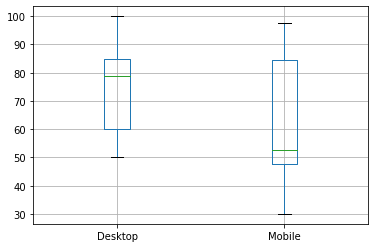

In [11]:
df = pd.DataFrame({"Desktop": susDesktop, "Mobile": susMobile})
print("Desktop median:", df["Desktop"].median())
print("Mobile median:", df["Mobile"].median())
boxplot = df.boxplot(column=['Desktop', 'Mobile'])  

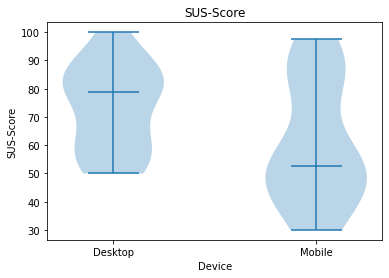

In [74]:


data = [df["Desktop"], df["Mobile"]]
# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot(data, showmedians=True)

ax.set(xticks=np.arange(1, 3), xlabel="Device", ylabel="SUS-Score")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Desktop'
labels[1] = 'Mobile'
ax.set_xticklabels(labels)
# Add title
ax.set_title('SUS-Score')
plt.savefig('Evaluation\img\SUS-Score_violin.png', dpi=300)
plt.show()

In [ ]:
# ASQ U-TEST SAME DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ4' + str(x+1), result)

In [ ]:
# ASQ U-TEST DIFFERENT DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ4' + str(x+1), result)